## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the Dataset

In [2]:
dataset= pd.read_csv('Desktop/Yahoo_Finance.csv')  
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,10.56,10.87,10.50,10.63,10.033685,45900
1,2012-11-01,10.71,11.41,10.59,11.22,10.590586,66400
2,2012-11-02,11.22,11.22,10.83,10.85,10.241342,38600
3,2012-11-05,10.99,11.40,10.86,11.27,10.637783,48600
4,2012-11-06,11.27,11.44,11.14,11.43,10.788806,28200


## Pre-preocessing the Dataset

In [3]:
import datetime as dt
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']=dataset['Date'].map(dt.datetime.toordinal)

indexDataset = dataset.set_index(['Date'])

indexDataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
734807,10.56,10.87,10.50,10.63,10.033685,45900
734808,10.71,11.41,10.59,11.22,10.590586,66400
734809,11.22,11.22,10.83,10.85,10.241342,38600
734812,10.99,11.40,10.86,11.27,10.637783,48600
734813,11.27,11.44,11.14,11.43,10.788806,28200


In [4]:
indexDataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
734807,10.560000,10.870000,10.500000,10.630000,10.033685,45900
734808,10.710000,11.410000,10.590000,11.220000,10.590586,66400
734809,11.220000,11.220000,10.830000,10.850000,10.241342,38600
734812,10.990000,11.400000,10.860000,11.270000,10.637783,48600
734813,11.270000,11.440000,11.140000,11.430000,10.788806,28200
...,...,...,...,...,...,...
737354,21.629999,21.790001,21.379999,21.389999,21.389999,39100
737355,21.400000,21.530001,21.370001,21.459999,21.459999,67100
737356,21.600000,21.639999,21.400000,21.600000,21.600000,74300


In [5]:
X = dataset.iloc[:, 0:2].values  
y = dataset['Close']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

## Multiple Linear Regression Implementation

In [8]:
classifier = LinearRegression()  
classifier.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = classifier.predict(X_test)  

## Visualizing the Output

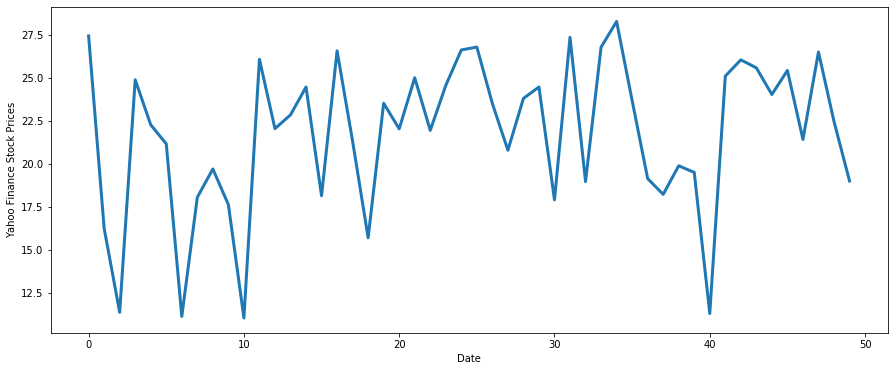

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.xlabel("Date")
plt.ylabel("Yahoo Finance Stock Prices")
plt.plot(y_pred[:50],linewidth=3.0)

In [15]:
tt=y_test
tt.reset_index(drop=True, inplace=True)

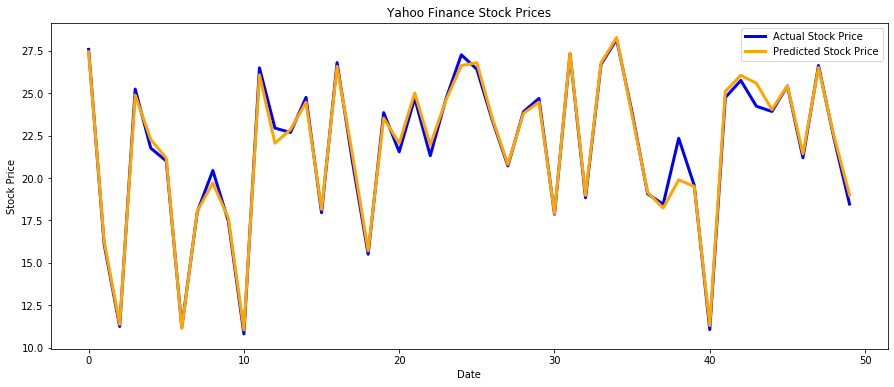

In [16]:
plt.plot(tt[:50], color = 'blue', label = 'Actual Stock Price',linewidth=3.0)
plt.plot(y_pred[:50], color = 'orange', label = 'Predicted Stock Price',linewidth=3.0)
plt.title('Yahoo Finance Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
y_pred

array([27.43985816, 16.24914338, 11.36310922, 24.89064621, 22.27220155,
       21.16313011, 11.12478615, 18.05417527, 19.70246649, 17.6274378 ,
       11.03543192, 26.08098407, 22.04784731, 22.85075268, 24.46917738,
       18.14529864, 26.57671213, 21.31371805, 15.70014476, 23.52632384,
       22.0378918 , 25.00985004, 21.94897326, 24.56330308, 26.6256902 ,
       26.79460812, 23.50786273, 20.79460388, 23.80593055, 24.46999378,
       17.9053597 , 27.36175383, 18.96900856, 26.78510846, 28.28312054,
       23.68691905, 19.14417423, 18.22474812, 19.88977559, 19.50234211,
       11.29355603, 25.10407205, 26.05127406, 25.58413082, 24.0344989 ,
       25.43416892, 21.41851512, 26.50780712, 22.463574  , 19.00626718,
       24.55231446, 17.71799336, 18.66852863, 17.43007365, 19.43272645,
       28.43191495, 17.44965995, 25.70350709, 19.48289865, 24.39056122,
       22.64232053, 18.57194727, 26.64607498, 20.21836036, 20.18219208,
       15.14514275, 24.38315542, 20.2585748 , 23.59541497, 22.91

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)

In [21]:
print(test_set_rmse)

0.37003965068906247


In [22]:
fit = classifier.fit(X,y)

In [23]:
fit.score(X,y)

0.9920622166959187